In [2]:
import importlib.util
def module_from_file(module_name, file_path): #The code that imports the file which originated the training with all the instructions
            spec = importlib.util.spec_from_file_location(module_name, file_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            return module

from importlib import import_module
#foo = import_module(fold_folder+'/Funs.py', package=None)


folder = './xforanalogs/NA24by48/Z8/yrs500/interT15fw20.1.20lrs4'
foo = module_from_file("foo", f'{folder}/Funs.py')

import random as rd  
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.metrics import log_loss

tff = foo.tff # tensorflow routines 
ut = foo.ut # utilities
ln = foo.ln #Learn2_new.py
print("==Checking GPU==")
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

print("==Checking CUDA==")
tf.test.is_built_with_cuda()

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
sys.path.insert(1, '../ERA')

print("==Reading data==")

year_permutation = np.load(f'{folder}/year_permutation.npy')

run_vae_kwargs = ut.json2dict(f"{folder}/config.json")
T = ut.extract_nested(run_vae_kwargs, 'T')
if (ut.keys_exists(run_vae_kwargs, 'label_period_start') and ut.keys_exists(run_vae_kwargs, 'label_period_end')):
    label_period_start = ut.extract_nested(run_vae_kwargs, 'label_period_start')
    label_period_end = ut.extract_nested(run_vae_kwargs, 'label_period_end')
    time_start = ut.extract_nested(run_vae_kwargs, 'time_start')
    time_end = ut.extract_nested(run_vae_kwargs, 'time_end')
    
    
n_days = time_end-time_start-T+1
n_days

import numpy as np
import pickle
folder = './xforanalogs/NA24by48/Z8/yrs500/interT15fw20.1.20lrs4/'
open_file = open(f'{folder}/committor.pkl', "rb")
committor_dictionary = pickle.load(open_file)
open_file.close()
committor = committor_dictionary['committor']
committor_dictionary.keys()

2022-07-15 14:42:03.613441: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
In this environment you cannot import Basemap
In this environment you cannot import Basemap


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-07-15 14:42:07.635227: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-15 14:42:07.641205: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-15 14:42:07.855455: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-15 14:42:07.855503: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (apollo2048g): /proc/driver/nvidia/version does not exist
2022-07-15 14:42:07.855516: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices

==Checking GPU==
==Checking CUDA==
==Reading data==


dict_keys(['committor', 'skill', 'RunFolds_kwargs_default'])

In [3]:
committor_dictionary['RunFolds_kwargs_default']

{'nfield': 0,
 'input_set': 'va',
 'bulk_set': 'tr',
 'RunCheckpoints_kwargs': {'allowselfanalogs': True,
  'RunNeighbors_kwargs': {'num_Traj': 10000,
   'T': 15,
   'chain_step': 3,
   'neighbors': [1, 2, 3, 5, 10, 20, 50, 100],
   'delay': array([0, 1, 2, 3, 4, 5])}}}

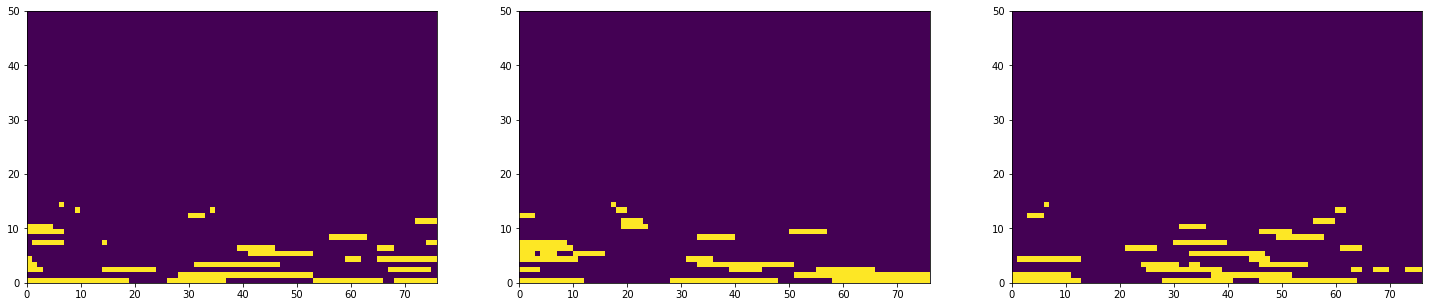

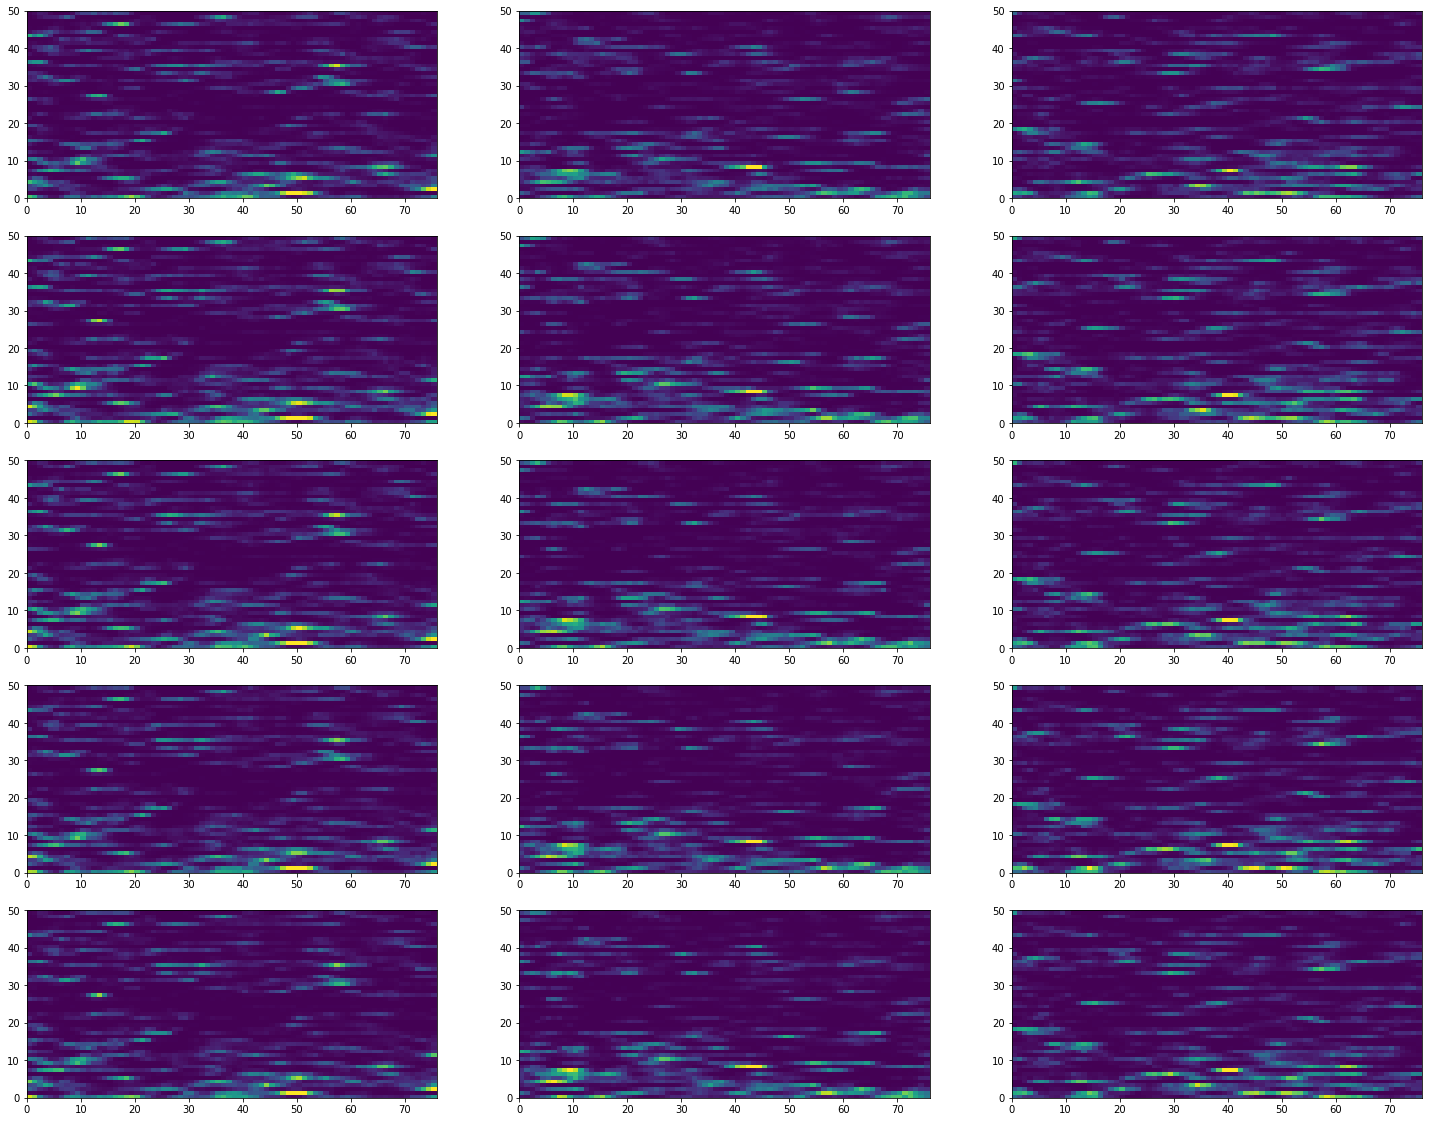

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
for fold in range(3):
        Y_va = np.load(f'{folder}/fold_{fold}/Y_va.npy')
        Y_va = Y_va.reshape(-1,n_days)[:,(label_period_start-time_start):(n_days-T+1)]
        ax = fig.add_subplot(spec[0,fold])
        ax.pcolor(Y_va, vmin=0, vmax=1)

nn = 50
tau = 0
fig2 = plt.figure(figsize=(25, 20))
spec2 = gridspec.GridSpec(ncols=3, nrows=len(list(committor.keys())), figure=fig2)
for i,checkpoint in enumerate(list(committor.keys())):
        for fold in range(3):
                q = committor[checkpoint][nn][fold]
                q = q.reshape(-1,n_days,q.shape[1])[:,(label_period_start-time_start-3*tau):(n_days-T+1-3*tau),tau]
                ax = fig2.add_subplot(spec2[i,fold])
                ax.pcolor(q, vmin=0, vmax=.5)

In [27]:
delay = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'delay')
chain_step = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'chain_step')
import pandas as pd
skill = committor_dictionary['skill']
skill = []
for check, value_check in committor_dictionary['skill'].items():
        score_nn = []
        for nn, value_nn in value_check.items():     
                score_fold = []
                for fold, value_fold in value_nn.items():
                        score_fold.append(pd.DataFrame([value_fold], columns = -delay*chain_step) )
                score_nn.append(pd.concat(score_fold, keys=value_nn.keys(),names=['fold', None]))
        skill.append(pd.concat(score_nn, keys=value_check.keys(),names=['nn','fold', None]))
skill = pd.concat(skill, keys =committor_dictionary['skill'].keys(), names=['check','nn','fold', None] )

In [33]:
meanskill = skill.groupby(['check', 'nn']).mean() #.loc[(slice(None), 1), 'skill'] #.droplevel(level=(1,2)) 
meanskill

0        -3        -6        -9        -12       -15
check nn                                                             
1     1   -4.903276 -5.880680 -6.126053 -6.175128 -6.158769 -6.195575
      2   -0.617338 -0.824966 -0.735250 -0.491506 -0.194653 -0.076131
      3    0.079613 -0.012719  0.002837  0.010355  0.010365  0.011468
      5    0.275616  0.133229  0.066944  0.034092  0.021674  0.014037
      10   0.306418  0.151945  0.071900  0.032891  0.018240  0.009799
      20   0.303498  0.145335  0.065006  0.025778  0.011625  0.004065
      50   0.295388  0.134959  0.053965  0.016533  0.003527 -0.002826
      100  0.287835  0.125069  0.045451  0.009505 -0.003355 -0.008808
5     1   -4.537260 -5.291783 -5.592366 -5.788665 -5.921575 -5.850008
      2   -0.505938 -0.694122 -0.505309 -0.312788 -0.147164 -0.036817
      3    0.161691  0.077326  0.075869  0.077270  0.074549  0.068540
      5    0.324216  0.199921  0.141887  0.100651  0.081421  0.065209
      10   0.341947  0.204006  0.135134  0.090621  0.067062  0.050747
      20   0.335519  0.192735  0.119313  0.075375  0.052501  0.037240
      50   0.323309  0.174189  0.099661  0.057527  0.036324  0.023166
      100  0.311143  0.158297  0.084705  0.045036  0.025079  0.014327
10    1   -4.437066 -5.128201 -5.580097 -5.790709 -5.864321 -5.843874
      2   -0.541140 -0.684998 -0.518866 -0.309099 -0.130910 -0.032295
      3    0.116836  0.063828  0.088826  0.087652  0.080513  0.076217
      5    0.329735  0.205026  0.147888  0.110884  0.091007  0.075777
      10   0.346430  0.206835  0.140260  0.098037  0.074401  0.057576
      20   0.338875  0.195883  0.124536  0.081769  0.059120  0.043503
      50   0.325309  0.175187  0.102557  0.061241  0.039827  0.026899
      100  0.312326  0.158967  0.086431  0.046756  0.026806  0.015591
100   1   -4.719245 -5.555560 -5.809112 -5.868411 -5.780485 -5.772306
      2   -0.713750 -0.842986 -0.610457 -0.416038 -0.205963 -0.085222
      3    0.066724  0.012860  0.048284  0.077254  0.077410  0.069886
      5    0.305370  0.183486  0.136015  0.102513  0.084897  0.073619
      10   0.335678  0.201607  0.136726  0.093117  0.070788  0.057012
      20   0.331286  0.192172  0.122609  0.078583  0.056417  0.042620
      50   0.320385  0.175054  0.103073  0.060884  0.039898  0.026942
      100  0.308985  0.157930  0.086731  0.046774  0.027324  0.016000
1000  1   -4.733559 -5.492172 -5.800933 -5.864321 -5.919530 -5.935889
      2   -0.768667 -0.993170 -0.813139 -0.587748 -0.364310 -0.216444
      3    0.031945 -0.029368  0.011541  0.044076  0.064272  0.060109
      5    0.303510  0.181774  0.129435  0.097846  0.080504  0.070464
      10   0.333568  0.198112  0.130729  0.089022  0.068088  0.053939
      20   0.328848  0.187742  0.119275  0.075451  0.053546  0.039818
      50   0.316231  0.168545  0.097988  0.056510  0.035673  0.023156
      100  0.304098  0.152213  0.081653  0.042021  0.022831  0.011419

In [52]:
for i in list(meanskill.columns):
    print(meanskill[i].max(), meanskill[i].idxmax())

0.3464304553974921 (10, 10)
0.2068348647877007 (10, 10)
0.14788770284433989 (10, 5)
0.11088385220721424 (10, 5)
0.0910074172112781 (10, 5)
0.07621688720575216 (10, 3)


In [54]:
folder = './xforanalogs/NA24by48/global_logit/yrs500/interT15'
open_file = open(f'{folder}/committor.pkl', "rb")
committor_dictionary = pickle.load(open_file)
open_file.close()
committor = committor_dictionary['committor']
print(committor_dictionary['RunFolds_kwargs_default'])
delay = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'delay')
chain_step = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'chain_step')
import pandas as pd
skill = committor_dictionary['skill']
skill = []
for check, value_check in committor_dictionary['skill'].items():
        score_nn = []
        for nn, value_nn in value_check.items():     
                score_fold = []
                for fold, value_fold in value_nn.items():
                        score_fold.append(pd.DataFrame([value_fold], columns = -delay*chain_step) )
                score_nn.append(pd.concat(score_fold, keys=value_nn.keys(),names=['fold', None]))
        skill.append(pd.concat(score_nn, keys=value_check.keys(),names=['nn','fold', None]))
skill = pd.concat(skill, keys =committor_dictionary['skill'].keys(), names=['check','nn','fold', None] )
meanskill = skill.groupby(['check', 'nn']).mean()
for i in list(meanskill.columns):
    print(meanskill[i].max(), meanskill[i].idxmax())

{'nfield': 0, 'input_set': 'va', 'bulk_set': 'tr', 'RunCheckpoints_kwargs': {'allowselfanalogs': True, 'RunNeighbors_kwargs': {'num_Traj': 10000, 'T': 15, 'chain_step': 3, 'neighbors': [1, 2, 3, 5, 10, 20, 50, 100], 'delay': array([0, 1, 2, 3, 4, 5])}}}
0.3257561563939858 (1, 100)
0.20868141601062104 (1, 10)
0.18459539969305455 (1, 10)
0.1800839522843114 (1, 100)
0.178556411550915 (1, 50)
0.17750371221512315 (1, 50)


In [55]:
folder = './xforanalogs/NA24by48/Z8/yrs500/interT15fw20.4.20lrs4'
open_file = open(f'{folder}/committor.pkl', "rb")
committor_dictionary = pickle.load(open_file)
open_file.close()
committor = committor_dictionary['committor']
print(committor_dictionary['RunFolds_kwargs_default'])
delay = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'delay')
chain_step = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'chain_step')
import pandas as pd
skill = committor_dictionary['skill']
skill = []
for check, value_check in committor_dictionary['skill'].items():
        score_nn = []
        for nn, value_nn in value_check.items():     
                score_fold = []
                for fold, value_fold in value_nn.items():
                        score_fold.append(pd.DataFrame([value_fold], columns = -delay*chain_step) )
                score_nn.append(pd.concat(score_fold, keys=value_nn.keys(),names=['fold', None]))
        skill.append(pd.concat(score_nn, keys=value_check.keys(),names=['nn','fold', None]))
skill = pd.concat(skill, keys =committor_dictionary['skill'].keys(), names=['check','nn','fold', None] )
meanskill = skill.groupby(['check', 'nn']).mean()
for i in list(meanskill.columns):
    print(meanskill[i].max(), meanskill[i].idxmax())

{'nfield': 0, 'input_set': 'va', 'bulk_set': 'tr', 'RunCheckpoints_kwargs': {'allowselfanalogs': True, 'RunNeighbors_kwargs': {'num_Traj': 10000, 'T': 15, 'chain_step': 3, 'neighbors': [1, 2, 3, 5, 10, 20, 50, 100], 'delay': array([0, 1, 2, 3, 4, 5])}}}
0.2933335693157025 (100, 10)
0.13468794669213668 (100, 10)
0.07019532119933782 (100, 10)
0.03485867362102994 (100, 10)
0.020389368465234294 (1000, 5)
0.015092318599419521 (1000, 5)


In [56]:
folder = './xforanalogs/NA24by48/Z8/yrs500/interT15fw20.1.20skip2'
open_file = open(f'{folder}/committor.pkl', "rb")
committor_dictionary = pickle.load(open_file)
open_file.close()
committor = committor_dictionary['committor']
print(committor_dictionary['RunFolds_kwargs_default'])
delay = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'delay')
chain_step = ut.extract_nested(committor_dictionary['RunFolds_kwargs_default'],'chain_step')
import pandas as pd
skill = committor_dictionary['skill']
skill = []
for check, value_check in committor_dictionary['skill'].items():
        score_nn = []
        for nn, value_nn in value_check.items():     
                score_fold = []
                for fold, value_fold in value_nn.items():
                        score_fold.append(pd.DataFrame([value_fold], columns = -delay*chain_step) )
                score_nn.append(pd.concat(score_fold, keys=value_nn.keys(),names=['fold', None]))
        skill.append(pd.concat(score_nn, keys=value_check.keys(),names=['nn','fold', None]))
skill = pd.concat(skill, keys =committor_dictionary['skill'].keys(), names=['check','nn','fold', None] )
meanskill = skill.groupby(['check', 'nn']).mean()
for i in list(meanskill.columns):
    print(meanskill[i].max(), meanskill[i].idxmax())

{'nfield': 0, 'input_set': 'va', 'bulk_set': 'tr', 'RunCheckpoints_kwargs': {'allowselfanalogs': True, 'RunNeighbors_kwargs': {'num_Traj': 10000, 'T': 15, 'chain_step': 3, 'neighbors': [1, 2, 3, 5, 10, 20, 50, 100], 'delay': array([0, 1, 2, 3, 4, 5])}}}
0.34074803929902087 (10, 10)
0.2062469183745394 (1000, 10)
0.14193000799384353 (10, 5)
0.107258118855787 (10, 5)
0.09066756171059134 (10, 5)
0.0817980957833347 (10, 3)
